![alt text](images/Kusto.jpg "Kusto Magic")

# Kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from PyPI and install/update
(if latest version is already installed you can skip this step)

In [1]:
#!pip install Kqlmagic --upgrade

## If you want to pre-set defaults, set environment varaible, before activation notebook, or within notebook
- **KQLMAGIC_NOTEBOOK_APP** - set the notebook application (default **jupyternotebook**)
- **KQLMAGIC_LOAD_MODE** - set the kqlmagic load mode (default **verbose**). If silent, it will load without welcome output
- **KQLMAGIC_CONFIGURATION** - modify the default configuration, key=value pairs must be separated by a **semicolon**

- **KQLMAGIC_CONNECTION_STR** - set the default connection string (default **None**). If set it will connect to it on Kqlmagic load

In [2]:
# you can try it within the notebook, by setting the environment variable using %env magic

#%env KQLMAGIC_NOTEBOOK_APP=jupyterlab
#%env KQLMAGIC_LOAD_MODE=silent
#%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"

#%env KQLMAGIC_CONNECTION_STR=kusto://username='michabin@microsoft.com';cluster='help';database='Samples'

## Add Kqlmagic to notebook magics

C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure



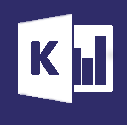

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks
popd -> c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks


In [3]:
%pushd C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure
%reload_ext Kqlmagic
%popd

  - ### <span style="color:#82CAFA">*Note: information is included in the kqlmagic banner, and in the note below it, with version and location of the open source code*</span>
  - ### <span style="color:#82CAFA">*Note: after kql magic was loaded, kql reference was added to Help memnu (Help tab)*</span>

## Connect to database@cluster
there are few options to authenticate with Azure Data Explorer (Kusto):<br>
```python
%kql kusto://code;cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql kusto://tenant='<tenant-id>';clientid='<aad-appid>';clientsecret='<aad-appkey>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql kusto://tenant='<tenant-id>';certificate='<certificate>';certificate_thumbprint='<thumbprint>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql kusto://tenant='<tenant-id>';certificate_pem_file='<pem_filename>';certificate_thumbprint='<thumbprint>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql kusto://username='<username>';password='<password>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```

Notes:<br>
(1) username/password works only on corporate network.<br>
(2) alias is optional.<br>
(3) if credentials are missing, and a previous connection was established the credentials will be inherited.<br>
(4) if secret (password / clientsecret / thumbprint) is missing, user will be prompted to provide it.<br>
(5) if cluster is missing, and a previous connection was established the cluster will be inherited.<br>
(6) if tenant is missing, and a previous connection was established the tenant will be inherited.<br>
(7) if only the database change, a new connection van be set as follow: 
**&lt;new-database-name&gt;@&lt;current-cluster&gt;**

In [4]:
%kql kusto://code;cluster='help';database='Samples'

<IPython.core.display.Javascript object>

  - ### <span style="color:#82CAFA">*Note - popup window that opened with the database@cluster schema*</span>
  - ### <span style="color:#82CAFA">*Note - Help menu contains the databse@cluster schema*</span>

## Once connected you can query the current database@cluster

In [5]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

## Python code can access the result by the \_ variable

In [6]:
_

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

## Converts result data to a dataframe

In [7]:
df = _.to_dataframe()
df

,State,count_
0,TEXAS,4701
1,KANSAS,3166
2,IOWA,2337
3,ILLINOIS,2022
4,MISSOURI,2016
5,GEORGIA,1983
6,MINNESOTA,1881
7,WISCONSIN,1850
8,NEBRASKA,1766
9,NEW YORK,1750


In [8]:
df.head()

,State,count_
0,TEXAS,4701
1,KANSAS,3166
2,IOWA,2337
3,ILLINOIS,2022
4,MISSOURI,2016


In [9]:
df.State

0        TEXAS
1       KANSAS
2         IOWA
3     ILLINOIS
4     MISSOURI
5      GEORGIA
6    MINNESOTA
7    WISCONSIN
8     NEBRASKA
9     NEW YORK
Name: State, dtype: object

In [10]:
df.min()

State     GEORGIA
count_       1750
dtype: object

In [11]:
df.to_json()

'{"State":{"0":"TEXAS","1":"KANSAS","2":"IOWA","3":"ILLINOIS","4":"MISSOURI","5":"GEORGIA","6":"MINNESOTA","7":"WISCONSIN","8":"NEBRASKA","9":"NEW YORK"},"count_":{"0":4701,"1":3166,"2":2337,"3":2022,"4":2016,"5":1983,"6":1881,"7":1850,"8":1766,"9":1750}}'

In [12]:
df.columns

Index(['State', 'count_'], dtype='object')

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [13]:
_

Index(['State', 'count_'], dtype='object')

In [14]:
_kql_raw_result_

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

In [15]:
_

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

## Show a chart, render the query to the proper chart

In [16]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10 | render piechart title='my apple pie' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [TEXAS, KAN…

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

  - ### <span style="color:#82CAFA">*Note: the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [17]:
%kql my_bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [18]:
my_bar_chart

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

## Access table data

In [19]:
my_bar_chart.show_table()

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


In [20]:
my_bar_chart[1]

{'State': 'KANSAS', 'count_': 3166}

In [21]:
my_bar_chart[1][1:]

{'count_': 3166}

In [22]:
my_bar_chart[1]['State']

'KANSAS'

In [23]:
my_bar_chart[1:5]

[{'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016}]

In [24]:
storm_events = %kql StormEvents | project StartTime, State, StormSummary | limit 3
storm_events

StartTime,State,StormSummary
2007-09-29 08:11:00+00:00,ATLANTIC SOUTH,"{ [34;01m""Details""[39;49;00m: { [34;01m""Description""[39;49;00m: [33m""A waterspout formed in the Atlantic southeast of Melbourne Beach and briefly moved toward shore.""[39;49;00m, [34;01m""Location""[39;49;00m: [33m""ATLANTIC SOUTH""[39;49;00m }, [34;01m""EndTime""[39;49;00m: [33m""2007-09-29T08:11:00.0000000Z""[39;49;00m, [34;01m""StartTime""[39;49;00m: [33m""2007-09-29T08:11:00.0000000Z""[39;49;00m, [34;01m""TotalDamages""[39;49;00m: [34m0[39;49;00m}"
2007-09-18 20:00:00+00:00,FLORIDA,"{ [34;01m""Details""[39;49;00m: { [34;01m""Description""[39;49;00m: [33m""As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.""[39;49;00m, [34;01m""Location""[39;49;00m: [33m""FLORIDA""[39;49;00m }, [34;01m""EndTime""[39;49;00m: [33m""2007-09-19T18:00:00.0000000Z""[39;49;00m, [34;01m""StartTime""[39;49;00m: [33m""2007-09-18T20:00:00.0000000Z""[39;49;00m, [34;01m""TotalDamages""[39;49;00m: [34m0[39;49;00m}"
2007-09-20 21:57:00+00:00,FLORIDA,"{ [34;01m""Details""[39;49;00m: { [34;01m""Description""[39;49;00m: [33m""A tornado touched down in the Town of Eustis at the northern end of West Crooked Lake. The tornado quickly intensified to EF1 strength as it moved north northwest through Eustis. The track was just under two miles long and had a maximum width of 300 yards. The tornado destroyed 7 homes. Twenty seven homes received major damage and 81 homes reported minor damage. There were no serious injuries and property damage was set at $6.2 million.""[39;49;00m, [34;01m""Location""[39;49;00m: [33m""FLORIDA""[39;49;00m }, [34;01m""EndTime""[39;49;00m: [33m""2007-09-20T22:05:00.0000000Z""[39;49;00m, [34;01m""StartTime""[39;49;00m: [33m""2007-09-20T21:57:00.0000000Z""[39;49;00m, [34;01m""TotalDamages""[39;49;00m: [34m6200000[39;49;00m}"


[{'StartTime': datetime.datetime(2007, 9, 29, 8, 11, tzinfo=tzutc()), 'State': 'ATLANTIC SOUTH', 'StormSummary': {'TotalDamages': 0, 'StartTime': '2007-09-29T08:11:00.0000000Z', 'EndTime': '2007-09-29T08:11:00.0000000Z', 'Details': {'Description': 'A waterspout formed in the Atlantic southeast of Melbourne Beach and briefly moved toward shore.', 'Location': 'ATLANTIC SOUTH'}}},
 {'StartTime': datetime.datetime(2007, 9, 18, 20, 0, tzinfo=tzutc()), 'State': 'FLORIDA', 'StormSummary': {'TotalDamages': 0, 'StartTime': '2007-09-18T20:00:00.0000000Z', 'EndTime': '2007-09-19T18:00:00.0000000Z', 'Details': {'Description': 'As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.', 'Location': 'FLORIDA'}}},
 {'StartTime': datetime.datetime(2007, 9, 20, 21, 57, tzinfo=tzutc()), 'State': 'FLORIDA', 'StormSummary': {'TotalDamages': 6200000, 'StartTime': '2007-09-20T21:57:00.0000000Z', 'EndTime': '2007-09-20T22:05:00.0000000Z', 'Details': {'Description': 'A tornado touched down in the Town of Eustis at the northern end of West Crooked Lake. The tornado quickly intensified to EF1 strength as it moved north northwest through Eustis. The track was just under two miles long and had a maximum width of 300 yards.  The tornado destroyed 7 homes. Twenty seven homes received major damage and 81 homes reported minor damage. There were no serious injuries and property damage was set at $6.2 million.', 'Location': 'FLORIDA'}}}]

In [25]:
storm_events[1:3]

[{'StartTime': datetime.datetime(2007, 9, 18, 20, 0, tzinfo=tzutc()), 'State': 'FLORIDA', 'StormSummary': {'TotalDamages': 0, 'StartTime': '2007-09-18T20:00:00.0000000Z', 'EndTime': '2007-09-19T18:00:00.0000000Z', 'Details': {'Description': 'As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.', 'Location': 'FLORIDA'}}},
 {'StartTime': datetime.datetime(2007, 9, 20, 21, 57, tzinfo=tzutc()), 'State': 'FLORIDA', 'StormSummary': {'TotalDamages': 6200000, 'StartTime': '2007-09-20T21:57:00.0000000Z', 'EndTime': '2007-09-20T22:05:00.0000000Z', 'Details': {'Description': 'A tornado touched down in the Town of Eustis at the northern end of West Crooked Lake. The tornado quickly intensified to EF1 strength as it moved north northwest through Eustis. The track was just under two miles long and had a maximum width of 300 yards.  The tornado destroyed 7 homes. Twenty seven homes received major damage and 81 homes reported minor damage. There were no serious 

In [26]:
storm_events[1]['StartTime']

datetime.datetime(2007, 9, 18, 20, 0, tzinfo=tzutc())

In [27]:
storm_events[1]['State']

'FLORIDA'

In [28]:
storm_events[1]['StormSummary']

{
    "Details": {
        "Description": "As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.",
        "Location": "FLORIDA"
    },
    "EndTime": "2007-09-19T18:00:00.0000000Z",
    "StartTime": "2007-09-18T20:00:00.0000000Z",
    "TotalDamages": 0
}

In [29]:
storm_events[1]['StormSummary']['Details']

{
    "Description": "As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.",
    "Location": "FLORIDA"
}

In [30]:
storm_events[1]['StormSummary']['Details']['Description']

'As much as 9 inches of rain fell in a 24-hour period across parts of coastal Volusia County.'

  - ### <span style="color:#82CAFA">*Note: that you can access directly dynamic object data.*</span>

In [31]:
df = storm_events.to_dataframe()
df

,StartTime,State,StormSummary
0,2007-09-29 08:11:00,ATLANTIC SOUTH,"{'TotalDamages': 0, 'StartTime': '2007-09-29T0..."
1,2007-09-18 20:00:00,FLORIDA,"{'TotalDamages': 0, 'StartTime': '2007-09-18T2..."
2,2007-09-20 21:57:00,FLORIDA,"{'TotalDamages': 6200000, 'StartTime': '2007-0..."


In [32]:
df['StormSummary'][0]['Details']['Description']

'A waterspout formed in the Atlantic southeast of Melbourne Beach and briefly moved toward shore.'

  - ### <span style="color:#82CAFA">*Note: that access to data in dataframe is different, you first specify the column and then the row.*</span>

In [33]:
df['StartTime'][1]

Timestamp('2007-09-18 20:00:00')

  - ### <span style="color:#82CAFA">*Note: that datetime in dataframe is Timestamp.*</span>

## Cell mixed with single line kql queries 

In [34]:
%kql bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

+-----------+--------+
|   State   | count_ |
+-----------+--------+
|   TEXAS   |  4701  |
|   KANSAS  |  3166  |
|    IOWA   |  2337  |
|  ILLINOIS |  2022  |
|  MISSOURI |  2016  |
|  GEORGIA  |  1983  |
| MINNESOTA |  1881  |
| WISCONSIN |  1850  |
|  NEBRASKA |  1766  |
|  NEW YORK |  1750  |
+-----------+--------+


FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [TEXAS, KAN…

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

  - ### <span style="color:#82CAFA">*Note: single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [35]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

  - ### <span style="color:#82CAFA">*Note: that this is a multiline magic, it starts with \%\%. It can include only kql code*</span>

## Show last chart result as a table

In [36]:
_.show_table()

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


## Show last result in a popup window

In [37]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

  - ### <span style="color:#82CAFA">*Note: when you F5, you loose the latest chart display state*</span>

## Show last chart result as a table in a popup window

In [38]:
_kql_raw_result_.popup_table()

## More complex chart

In [39]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 10 
    | render piechart title='my pie chart #2' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 0.475], 'y': [0.0, 1.0]},
              'labels': [TEXAS, K…

[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256},
 {'State': 'GEORGIA', 'count_': 1983, 'count2': 3932289},
 {'State': 'MINNESOTA', 'count_': 1881, 'count2': 3538161},
 {'State': 'WISCONSIN', 'count_': 1850, 'count2': 3422500},
 {'State': 'NEBRASKA', 'count_': 1766, 'count2': 3118756},
 {'State': 'NEW YORK', 'count_': 1750, 'count2': 3062500}]

## Convert result data to dictionary of columns

In [40]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

{'State': ('TEXAS', 'KANSAS', 'IOWA', 'ILLINOIS', 'MISSOURI', 'GEORGIA', 'MINNESOTA', 'WISCONSIN', 'NEBRASKA', 'NEW YORK'), 'count_': (4701, 3166, 2337, 2022, 2016, 1983, 1881, 1850, 1766, 1750), 'count2': (22099401, 10023556, 5461569, 4088484, 4064256, 3932289, 3538161, 3422500, 3118756, 3062500)}


In [41]:
_kql_raw_result_.to_csv('csv_file.csv')
#%cat csv_file.csv

csv results at c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks\csv_file.csv

# Get last kql query attributes 

## Query string

In [42]:
_kql_raw_result_.query

"StormEvents\n    | summarize count() by State\n    | sort by count_ \n    | extend count2 = count_*count_ \n    | limit 10 \n    | render piechart title='my pie chart #2'"

## Query render title

In [43]:
_kql_raw_result_.title

'my pie chart #2'

## Query render visualization

In [44]:
_kql_raw_result_.visualization

'piechart'

## Number of records in query response 

In [45]:
_kql_raw_result_.records_count

10

## List of columns in query table response

In [46]:
_kql_raw_result_.columns_name

['State', 'count_', 'count2']

## Kqlmagic time metric (in seconds)

In [47]:
_kql_raw_result_.start_time

1540141397.1576884

In [48]:
_kql_raw_result_.end_time

1540141397.9288795

In [49]:
_kql_raw_result_.elapsed_timespan

0.7711911201477051

## Query connection database@cluster

In [50]:
_kql_raw_result_.connection

'Samples@help'

## Query Options (settings) 

In [51]:
_kql_raw_result_.options

{'auto_dataframe': False,
 'short_errors': True,
 'feedback': True,
 'show_conn_info': 'current',
 'columns_to_local_vars': False,
 'show_query_time': True,
 'enable_suppress_result': True,
 'plotly_fs_includejs': False,
 'popup_window': False,
 'auto_limit': 0,
 'display_limit': None,
 'prettytable_style': 'DEFAULT',
 'last_raw_result_var': '_kql_raw_result_',
 'table_package': 'prettytable',
 'plot_package': 'plotly',
 'dsn_filename': 'odbc.ini',
 'validate_connection_string': True,
 'auto_popup_schema': True,
 'json_display': 'formatted',
 'popup_help': False,
 'popup_schema': False,
 'palette_colors': 10,
 'palette_desaturation': 1.0,
 'params_dict': None,
 'palette_name': 'tab10',
 'temp_folder_name': 'Kqlmagic_temp_files',
 'cache_folder_name': 'Kqlmagic_cache_files',
 'export_folder_name': 'Kqlmagic_exported_files',
 'notebook_app': 'jupyternotebook',
 'add_kql_ref_to_help': True,
 'add_schema_to_help': True,
 'cache': False,
 'use_cache': False,
 'version': False,
 'palette': F

## Completion query information (query metadata)

In [52]:
_kql_raw_result_.completion_query_info

{
    "Count": 1,
    "Text": "Query completed successfully"
}

## Completion query resource consumption (query metadata)

In [53]:
_kql_raw_result_.completion_query_resource_consumption

{
    "ExecutionTime": 0.0,
    "dataset_statistics": [
        {
            "table_row_count": 10,
            "table_size": 293
        }
    ],
    "input_dataset_statistics": {
        "extents": {
            "scanned": 1,
            "total": 1
        },
        "rows": {
            "scanned": 59066,
            "total": 59066
        },
        "rowstores": {
            "scanned_rows": 0
        }
    },
    "resource_usage": {
        "cache": {
            "disk": {
                "hits": 0,
                "misses": 0,
                "total": 0
            },
            "memory": {
                "hits": 71,
                "misses": 0,
                "total": 71
            }
        },
        "cpu": {
            "kernel": "00:00:00",
            "total cpu": "00:00:00",
            "user": "00:00:00"
        },
        "memory": {
            "peak_per_node": 0
        }
    }
}

In [54]:
_kql_raw_result_.completion_query_resource_consumption['resource_usage']['cache']['memory']['hits']

71

## Query raw json response

In [55]:
_kql_raw_result_.raw_json

[
    {
        "FrameType": "DataSetHeader",
        "IsProgressive": false,
        "Version": "v2.0"
    },
    {
        "Columns": [
            {
                "ColumnName": "TableId",
                "ColumnType": "int"
            },
            {
                "ColumnName": "Key",
                "ColumnType": "string"
            },
            {
                "ColumnName": "Value",
                "ColumnType": "dynamic"
            }
        ],
        "FrameType": "DataTable",
        "Rows": [
            [
                1,
                "Visualization",
                "{\"Visualization\":\"piechart\",\"Title\":\"my pie chart #2\",\"XColumn\":null,\"Series\":null,\"YColumns\":null,\"XTitle\":null,\"YTitle\":null,\"XAxis\":null,\"YAxis\":null,\"Legend\":null,\"YSplit\":null,\"Accumulate\":false,\"IsQuerySorted\":true,\"Kind\":null}"
            ]
        ],
        "TableId": 0,
        "TableKind": "QueryProperties",
        "TableName": "@ExtendedProperties"
 

In [56]:
_kql_raw_result_.raw_json[0]['Version']

'v2.0'

In [57]:
_kql_raw_result_.raw_json[1]['Columns']

[
    {
        "ColumnName": "TableId",
        "ColumnType": "int"
    },
    {
        "ColumnName": "Key",
        "ColumnType": "string"
    },
    {
        "ColumnName": "Value",
        "ColumnType": "dynamic"
    }
]

In [58]:
_kql_raw_result_.raw_json[1]['Columns'][1]['ColumnType']

'string'

# Advanced part

## Kql query with option -c2lv (-columns_to_local_vars)

In [59]:
%%kql -c2lv 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: option are specified before the query*</span>
  - ### <span style="color:#82CAFA">*Note: c2lv is abbreviation of columns_to_local_vars options*</span>
  - ### <span style="color:#82CAFA">*Note: columns_to_local_vars option returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [60]:
State

('TEXAS',
 'KANSAS',
 'IOWA',
 'ILLINOIS',
 'MISSOURI',
 'GEORGIA',
 'MINNESOTA',
 'WISCONSIN',
 'NEBRASKA',
 'NEW YORK')

In [61]:
count_

(4701, 3166, 2337, 2022, 2016, 1983, 1881, 1850, 1766, 1750)

## Kql query with option -ph (-popup_help)

In [62]:
%kql -ph

  - ### <span style="color:#82CAFA">*Note - current database@cluster is always shown*</span>

## Kql query with negated option -f (-feedback)

In [63]:
%%kql -!feedback 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render barchart title='my bar chart'

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

  - ### <span style="color:#82CAFA">*Note: the feedback message 'Done..... records' was not displayed because of the negated feedback option*</span>
  - ### <span style="color:#82CAFA">*Note: option is negated by adding \! before the option*</span>
  - ### <span style="color:#82CAFA">*Note: full option name instead of abbreviation can be used too*</span>
  - ### <span style="color:#82CAFA">*Note: feedback option is on by default, so to turn it off, it must be negated*</span>

## Get default value of optionfeedback (f)

In [64]:
%config Kqlmagic.feedback

True

  - ### <span style="color:#82CAFA">*Note: options have defaults, and can be accessed to read or modify using %config magic*</span>

## Set default value of option feedback (f) to False

In [65]:
%config Kqlmagic.feedback=False
%config Kqlmagic.feedback

False

In [66]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 5

State,count_,count2
TEXAS,4701,22099401
KANSAS,3166,10023556
IOWA,2337,5461569
ILLINOIS,2022,4088484
MISSOURI,2016,4064256


[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256}]

  - ### <span style="color:#82CAFA">*Note: feedback message was not displayed, because the default feedback option was set to False*</span>

In [67]:
%config Kqlmagic.feedback=True
%config Kqlmagic.feedback

True

## Kql query with option -version (print kqlmagic version)

In [68]:
%kql -version

Kqlmagic version: 0.1.61


## Show all option defaults with help

In [69]:
%config Kqlmagic

Kqlmagic options
--------------
Kqlmagic.add_kql_ref_to_help=<Bool>
    Current: True
    On Kqlmagic load auto add kql reference to Help menu.
Kqlmagic.add_schema_to_help=<Bool>
    Current: True
    On connection to database@cluster add  schema to Help menu.
Kqlmagic.auto_dataframe=<Bool>
    Current: False
    Return Pandas dataframe instead of regular result sets. Abbreviation: ad
Kqlmagic.auto_limit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets. Abbreviation: al
Kqlmagic.auto_popup_schema=<Bool>
    Current: True
    Popup schema when connecting to a new database. Abbreviation: aps
Kqlmagic.cache=<Bool>
    Current: False
    Cache query results.
Kqlmagic.cache_folder_name=<Unicode>
    Current: 'Kqlmagic_cache_files'
    Set the folder name for cache files
Kqlmagic.columns_to_local_vars=<Bool>
    Current: False
    Return data into local variables from column names. Abbreviation: c2lv
Kqlmagic.display_limit=<Int>
    Current: None
    Automati

## Show query results in a popup window

In [70]:
%%kql -pw 
    let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
    | limit 1000
    | extend e1 = randn()
    | extend e2 = randn()
    | extend e3 = randn()
    | extend e4 = randn()
    | extend e5 = randn()
    | project e1,e2,e3,e4,e5
    | render scatterchart title="Michael's chart"

[{'e1': 6.428730700264657, 'e2': 8.764453108329608, 'e3': 8.459750161598643, 'e4': 7.120791223715583, 'e5': 8.266568598026662},
 {'e1': 4.873483082264265, 'e2': 6.758282141006126, 'e3': 6.564561492023567, 'e4': 8.245410342750755, 'e5': 8.039472965736937},
 {'e1': 6.454267283549092, 'e2': 6.812705344001259, 'e3': 5.698127392776944, 'e4': 7.763737147858621, 'e5': 6.879166878801625},
 {'e1': 9.353122441319572, 'e2': 6.6416197640302235, 'e3': 5.622366593574075, 'e4': 7.440063765040665, 'e5': 5.924698150365785},
 {'e1': 7.571687473732577, 'e2': 5.737676652566812, 'e3': 8.106114422777283, 'e4': 8.342323576263647, 'e5': 4.61339962802191},
 {'e1': 6.2735825582522535, 'e2': 8.223639612524686, 'e3': 5.409491059018595, 'e4': 7.356839254199413, 'e5': 4.765404538855806},
 {'e1': 3.7831682670980196, 'e2': 7.833273616140919, 'e3': 7.102408494265044, 'e4': 7.033725184959355, 'e5': 8.014988883855759},
 {'e1': 6.7321983566673484, 'e2': 6.15857504693205, 'e3': 6.997412458564701, 'e4': 7.484271448235514, 'e5': 7.39535225829862},
 {'e1': 8.296327790108306, 'e2': 7.035927319881048, 'e3': 7.280024089115734, 'e4': 7.093067477864217, 'e5': 5.683949263293888},
 {'e1': 5.163362970905074, 'e2': 7.956785969411674, 'e3': 5.771747851989536, 'e4': 7.7079887362710275, 'e5': 7.17324643631759},
 {'e1': 7.553245271174933, 'e2': 7.213985366279989, 'e3': 7.595041425102212, 'e4': 6.219240041312761, 'e5': 6.134685832763196},
 {'e1': 8.021523792135772, 'e2': 4.137155840959911, 'e3': 7.971718435770586, 'e4': 6.565284444797601, 'e5': 5.5915933786598915},
 {'e1': 6.2243839584308125, 'e2': 7.618832352752869, 'e3': 8.913316312349904, 'e4': 5.721895317440423, 'e5': 5.77925918794861},
 {'e1': 6.725216762417263, 'e2': 8.395974903329195, 'e3': 8.69936755253449, 'e4': 6.629365053788341, 'e5': 8.01334927827081},
 {'e1': 6.633450437874434, 'e2': 9.01609038670084, 'e3': 6.660915861855921, 'e4': 7.721453553836344, 'e5': 7.783220078226304},
 {'e1': 7.82743715688052, 'e2': 5.813186028274686, 'e3': 7.316452940514014, 'e4': 8.028703808621549, 'e5': 4.806479475625024},
 {'e1': 6.740680526498723, 'e2': 5.2392697050690895, 'e3': 8.530105508643274, 'e4': 5.715977065880793, 'e5': 8.391808735511182},
 {'e1': 7.483321133798049, 'e2': 8.411424441097994, 'e3': 6.548990648299041, 'e4': 6.66306819147526, 'e5': 8.014566860709694},
 {'e1': 7.404795682567696, 'e2': 7.357311687806732, 'e3': 5.945127981992845, 'e4': 7.473648112876506, 'e5': 7.2927631616281285},
 {'e1': 8.018700028557017, 'e2': 8.68609906234569, 'e3': 6.776402856358119, 'e4': 8.928563502841655, 'e5': 5.479221412901942},
 {'e1': 6.8558279297695925, 'e2': 8.188137437169972, 'e3': 8.538667447928926, 'e4': 5.3268936450352795, 'e5': 5.293126352377257},
 {'e1': 7.995215585038901, 'e2': 8.166474739086885, 'e3': 6.322127981522203, 'e4': 5.586303938697694, 'e5': 5.464391918699031},
 {'e1': 6.826724824185982, 'e2': 9.39682681956823, 'e3': 7.504226726151766, 'e4': 8.537362752843904, 'e5': 6.103421155892204},
 {'e1': 5.499205589719727, 'e2': 9.136062651792763, 'e3': 6.826954119076832, 'e4': 5.378233077891704, 'e5': 6.197002704682855},
 {'e1': 6.65944081954184, 'e2': 6.287796539336786, 'e3': 6.983001164891126, 'e4': 7.227394315198246, 'e5': 7.6817800115041885},
 {'e1': 8.28838421159634, 'e2': 6.341759842569217, 'e3': 6.2235703756899605, 'e4': 7.48673172865808, 'e5': 7.836036887997564},
 {'e1': 6.8784844497816415, 'e2': 9.192817197036726, 'e3': 7.189919515295014, 'e4': 5.948813090363154, 'e5': 6.725603726541776},
 {'e1': 9.254889704071338, 'e2': 7.352378034879985, 'e3': 7.166889565805001, 'e4': 7.152892856966489, 'e5': 7.735314982794074},
 {'e1': 6.431812367281804, 'e2': 6.6252277471627545, 'e3': 6.368636153559828, 'e4': 8.810568708678682, 'e5': 7.299514350687783},
 {'e1': 6.5579763608930834, 'e2': 7.196421828240192, 'e3': 6.241051980457013, 'e4': 7.963026121472773, 'e5': 4.470381513848635},
 {'e1': 9.380086960006418, 'e2': 8.948467488860677, 'e3': 5.633360528070788, 'e4': 8.617013791689798, 'e5': 6.983286642122006},
 {'e1': 3.883318906602347, 'e2'

  - ### <span style="color:#82CAFA">*Note: popup_window option (abbr: pw) cause the result to be displayed in a popup window*</span>

## Empty table

In [71]:
%kql StormEvents | summarize count() by State | sort by count_ | extend count2 = count_*count_ | limit 0

State,count_,count2


[]

In [72]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_ * count_ 
    | limit 0 
    | render piechart title='my chart'

[]

In [73]:
len(_kql_raw_result_)

0

In [74]:
_kql_raw_result_.popup()

In [75]:
_kql_raw_result_.show_table()

State,count_,count2


In [76]:
df = _kql_raw_result_.to_dataframe()
df

,State,count_,count2


In [77]:
df.to_json()

'{"State":{},"count_":{},"count2":{}}'

In [78]:
_kql_raw_result_.raw_json

[
    {
        "FrameType": "DataSetHeader",
        "IsProgressive": false,
        "Version": "v2.0"
    },
    {
        "Columns": [
            {
                "ColumnName": "TableId",
                "ColumnType": "int"
            },
            {
                "ColumnName": "Key",
                "ColumnType": "string"
            },
            {
                "ColumnName": "Value",
                "ColumnType": "dynamic"
            }
        ],
        "FrameType": "DataTable",
        "Rows": [
            [
                1,
                "Visualization",
                "{\"Visualization\":\"piechart\",\"Title\":\"my chart\",\"XColumn\":null,\"Series\":null,\"YColumns\":null,\"XTitle\":null,\"YTitle\":null,\"XAxis\":null,\"YAxis\":null,\"Legend\":null,\"YSplit\":null,\"Accumulate\":false,\"IsQuerySorted\":true,\"Kind\":null}"
            ]
        ],
        "TableId": 0,
        "TableKind": "QueryProperties",
        "TableName": "@ExtendedProperties"
    },
 

## Kql request with fork - return multiple tables

In [79]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_ * count_ 
    | fork (limit 10) (project State | limit 5)

State,count_,count2
TEXAS,4701,22099401
KANSAS,3166,10023556
IOWA,2337,5461569
ILLINOIS,2022,4088484
MISSOURI,2016,4064256
GEORGIA,1983,3932289
MINNESOTA,1881,3538161
WISCONSIN,1850,3422500
NEBRASKA,1766,3118756
NEW YORK,1750,3062500


[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256},
 {'State': 'GEORGIA', 'count_': 1983, 'count2': 3932289},
 {'State': 'MINNESOTA', 'count_': 1881, 'count2': 3538161},
 {'State': 'WISCONSIN', 'count_': 1850, 'count2': 3422500},
 {'State': 'NEBRASKA', 'count_': 1766, 'count2': 3118756},
 {'State': 'NEW YORK', 'count_': 1750, 'count2': 3062500}]

In [80]:
_kql_raw_result_.fork_result(1)

State
TEXAS
KANSAS
IOWA
ILLINOIS
MISSOURI


[{'State': 'TEXAS'},
 {'State': 'KANSAS'},
 {'State': 'IOWA'},
 {'State': 'ILLINOIS'},
 {'State': 'MISSOURI'}]

## Submit same query

In [81]:
 _kql_raw_result_.submit()

State,count_,count2
TEXAS,4701,22099401
KANSAS,3166,10023556
IOWA,2337,5461569
ILLINOIS,2022,4088484
MISSOURI,2016,4064256
GEORGIA,1983,3932289
MINNESOTA,1881,3538161
WISCONSIN,1850,3422500
NEBRASKA,1766,3118756
NEW YORK,1750,3062500


[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256},
 {'State': 'GEORGIA', 'count_': 1983, 'count2': 3932289},
 {'State': 'MINNESOTA', 'count_': 1881, 'count2': 3538161},
 {'State': 'WISCONSIN', 'count_': 1850, 'count2': 3422500},
 {'State': 'NEBRASKA', 'count_': 1766, 'count2': 3118756},
 {'State': 'NEW YORK', 'count_': 1750, 'count2': 3062500}]

In [82]:
 _kql_raw_result_.fork_result(1)

State
TEXAS
KANSAS
IOWA
ILLINOIS
MISSOURI


[{'State': 'TEXAS'},
 {'State': 'KANSAS'},
 {'State': 'IOWA'},
 {'State': 'ILLINOIS'},
 {'State': 'MISSOURI'}]

## Refresh query

In [83]:
_kql_raw_result_.fork_result(1).refresh()

State
TEXAS
KANSAS
IOWA
ILLINOIS
MISSOURI


[{'State': 'TEXAS'},
 {'State': 'KANSAS'},
 {'State': 'IOWA'},
 {'State': 'ILLINOIS'},
 {'State': 'MISSOURI'}]

In [84]:
_kql_raw_result_.fork_result(0)

State,count_,count2
TEXAS,4701,22099401
KANSAS,3166,10023556
IOWA,2337,5461569
ILLINOIS,2022,4088484
MISSOURI,2016,4064256
GEORGIA,1983,3932289
MINNESOTA,1881,3538161
WISCONSIN,1850,3422500
NEBRASKA,1766,3118756
NEW YORK,1750,3062500


[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256},
 {'State': 'GEORGIA', 'count_': 1983, 'count2': 3932289},
 {'State': 'MINNESOTA', 'count_': 1881, 'count2': 3538161},
 {'State': 'WISCONSIN', 'count_': 1850, 'count2': 3422500},
 {'State': 'NEBRASKA', 'count_': 1766, 'count2': 3118756},
 {'State': 'NEW YORK', 'count_': 1750, 'count2': 3062500}]

In [85]:
_kql_raw_result_

State,count_,count2
TEXAS,4701,22099401
KANSAS,3166,10023556
IOWA,2337,5461569
ILLINOIS,2022,4088484
MISSOURI,2016,4064256
GEORGIA,1983,3932289
MINNESOTA,1881,3538161
WISCONSIN,1850,3422500
NEBRASKA,1766,3118756
NEW YORK,1750,3062500


[{'State': 'TEXAS', 'count_': 4701, 'count2': 22099401},
 {'State': 'KANSAS', 'count_': 3166, 'count2': 10023556},
 {'State': 'IOWA', 'count_': 2337, 'count2': 5461569},
 {'State': 'ILLINOIS', 'count_': 2022, 'count2': 4088484},
 {'State': 'MISSOURI', 'count_': 2016, 'count2': 4064256},
 {'State': 'GEORGIA', 'count_': 1983, 'count2': 3932289},
 {'State': 'MINNESOTA', 'count_': 1881, 'count2': 3538161},
 {'State': 'WISCONSIN', 'count_': 1850, 'count2': 3422500},
 {'State': 'NEBRASKA', 'count_': 1766, 'count2': 3118756},
 {'State': 'NEW YORK', 'count_': 1750, 'count2': 3062500}]